In [181]:
import dash
import jupyter_dash
from dash import dcc
from dash import html
import plotly.express as px
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np
import datetime as dt





In [182]:
df = pd.read_csv('subscription_log.csv')

df.dropna(subset=['price'], inplace=True)
df.dropna(subset=['target_customer'], inplace=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_Ym'] = df['created_at'].dt.strftime('%Y-%m')
print(df.shape)

(30855, 9)


In [183]:
df = df.replace({'bigBiz':'큰 사업체', 'middleBiz':'중간 사업체', 'smallBiz':'작은 사업체', 'personal':'개인'})
df.head()

,id,user_id,end_date,price,created_at,refund_id,point,target_customer,created_Ym
0,237,6482,2019-08-12 00:00:00,100.0,2019-07-12 18:13:14.541176,NaN,NaN,개인,2019-07
1,239,6574,2019-08-12 00:00:00,100.0,2019-07-12 19:26:47.483330,NaN,NaN,개인,2019-07
2,252,6704,2019-08-16 00:00:00,100.0,2019-07-16 09:21:31.787566,NaN,NaN,개인,2019-07
3,258,4709,2019-08-16 00:00:00,9900.0,2019-07-17 07:00:11.666693,NaN,NaN,개인,2019-07
4,259,6748,2019-08-17 00:00:00,100.0,2019-07-17 10:33:39.975256,NaN,NaN,개인,2019-07


In [184]:
df_non_refund = df[df['refund_id'].isnull()==True]

In [185]:
df_refund = df[df['refund_id'].isnull()!=True]

In [186]:
customer_count = df_non_refund.groupby('target_customer')['price'].count().reset_index()

In [187]:
customer_price_sum = df_non_refund.groupby('target_customer')['price'].sum().reset_index()

In [188]:
refund_count = df_refund.groupby('target_customer')['price'].count().reset_index()

In [189]:
customer_count.columns = ['고객 유형', '매출 건수']

customer_count

,고객 유형,매출 건수
0,개인,27065
1,작은 사업체,2881
2,중간 사업체,157
3,큰 사업체,6


In [190]:
customer_price_sum.columns = ['고객 유형', '매출']

customer_price_sum

,고객 유형,매출
0,개인,208552405.0
1,작은 사업체,161282030.0
2,중간 사업체,27938600.0
3,큰 사업체,3935340.0


In [191]:
refund_rate_data = {
    '고객 유형':['개인', '작은 사업체', '중간 사업체', '큰 사업체'],
    '환불율':[625*100/(625+27065), 70*100/(70+2881), 51*100/(51+157), 0]
}
refund_rate = pd.DataFrame(refund_rate_data)
refund_rate

,고객 유형,환불율
0,개인,2.257133
1,작은 사업체,2.372077
2,중간 사업체,24.519231
3,큰 사업체,0.000000


In [192]:
price_per_gun_data = {
    '고객 유형':['개인', '작은 사업체', '중간 사업체', '큰 사업체'],
    '건당 매출':[208552405.0/27065, 161282030.0/2881, 27938600.0/157, 3935340.0/6]
}
price_per_gun = pd.DataFrame(price_per_gun_data)
price_per_gun

,고객 유형,건당 매출
0,개인,7705.612599
1,작은 사업체,55981.266921
2,중간 사업체,177952.866242
3,큰 사업체,655890.000000


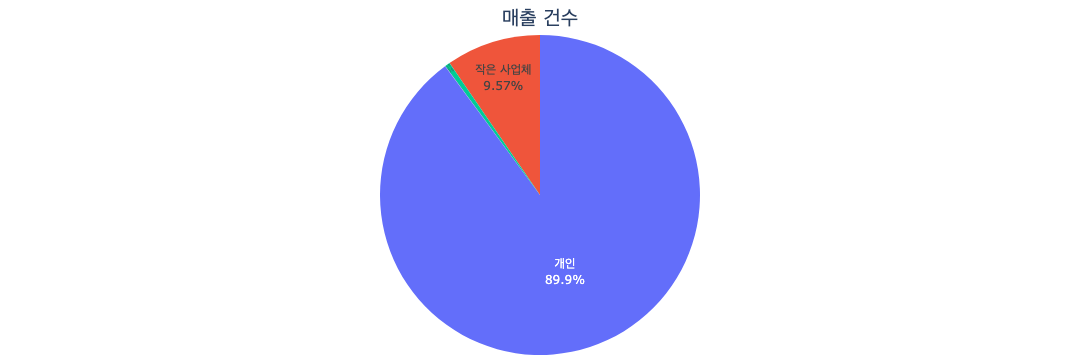

In [318]:
fig1 = px.pie(customer_count, values='매출 건수', names='고객 유형')
fig1.update_layout(
    title={
        'text':'매출 건수',
        'font': {'family': "verdana", 'size': 20},
        'x': 0.5,
        'y': 0.97,
        'xanchor': 'center'
    },
    showlegend = False,
    margin=dict(t=35, b=5, l=0, r=0)
)
fig1.update_traces(textposition='inside', textinfo='percent+label')

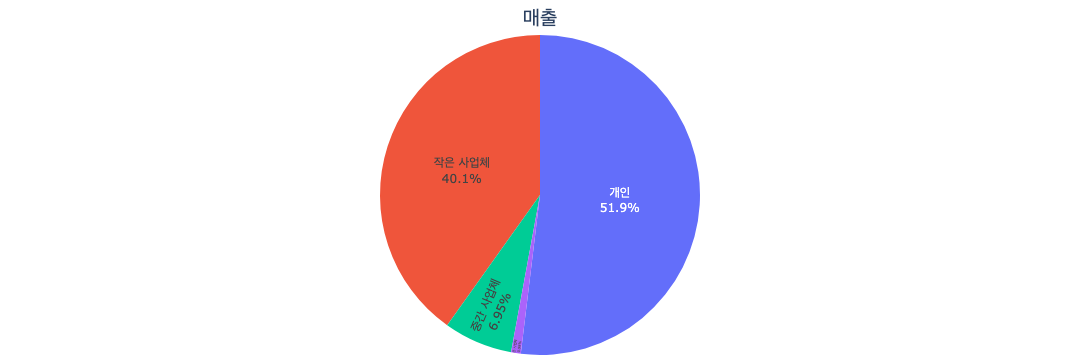

In [319]:
fig2 = px.pie(customer_price_sum, values='매출', names='고객 유형')
fig2.update_layout(
    title={
        'text':'매출',
        'font': {'family': "verdana", 'size': 20},
        'x': 0.5,
        'y': 0.97,
        'xanchor': 'center'
    },
    showlegend = False,
    margin=dict(t=35, b=5, l=0, r=0)
)
fig2.update_traces(textposition='inside', textinfo='percent+label')

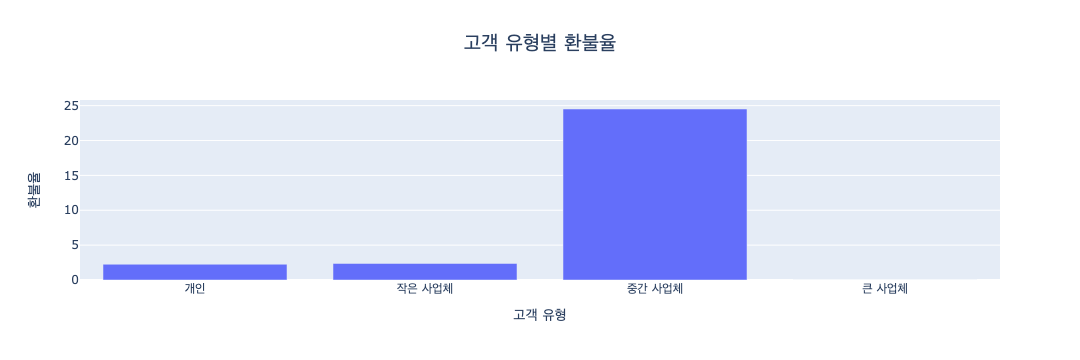

In [320]:
fig3 = px.bar(refund_rate, x='고객 유형', y='환불율',title="고객 유형별 환불율")
fig3.update_layout(
    title={

        'font': {'family': "verdana", 'size': 20},
        'x': 0.5,
        'xanchor': 'center'
    }
)

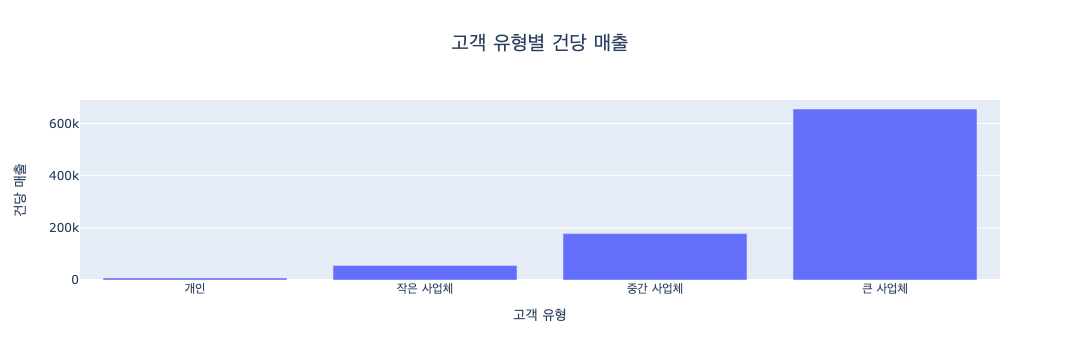

In [321]:
fig4 = px.bar(price_per_gun, x='고객 유형', y='건당 매출',title="고객 유형별 건당 매출")
fig4.update_layout(
    title={

        'font': {'family': "verdana", 'size': 20},
        'x': 0.5,
        'xanchor': 'center'
    }
)

In [322]:
df_refund_middle = df_refund[df_refund['target_customer']=='중간 사업체']
df_non_refund_middle = df_non_refund[df_non_refund['target_customer']=='중간 사업체']

In [323]:
refund_Ym = df_refund_middle.groupby('created_Ym')['price'].count().reset_index()
refund_Ym.columns = ['created_Ym', '환불 건수']
refund_Ym

,created_Ym,환불 건수
0,2019-07,1
1,2019-09,4
2,2019-10,3
3,2019-11,8
4,2019-12,5
5,2020-01,8
6,2020-02,2
7,2020-03,2
8,2020-04,3
9,2020-05,4


In [324]:
non_refund_Ym = df_non_refund_middle.groupby('created_Ym')['price'].count().reset_index()
non_refund_Ym.columns = ['created_Ym', '환불 안 한 건수']
non_refund_Ym

,created_Ym,환불 안 한 건수
0,2020-01,1
1,2020-02,2
2,2020-03,2
3,2020-04,1
4,2020-05,1
5,2020-06,1
6,2020-07,1
7,2020-08,1
8,2020-09,2
9,2020-10,4


In [325]:
middle_Ym = pd.merge(left = refund_Ym, right = non_refund_Ym, on='created_Ym', how='outer')
middle_Ym = middle_Ym.sort_values('created_Ym', ascending=True)
middle_Ym

,created_Ym,환불 건수,환불 안 한 건수
0,2019-07,1.0,NaN
1,2019-09,4.0,NaN
2,2019-10,3.0,NaN
3,2019-11,8.0,NaN
4,2019-12,5.0,NaN
5,2020-01,8.0,1.0
6,2020-02,2.0,2.0
7,2020-03,2.0,2.0
8,2020-04,3.0,1.0
9,2020-05,4.0,1.0


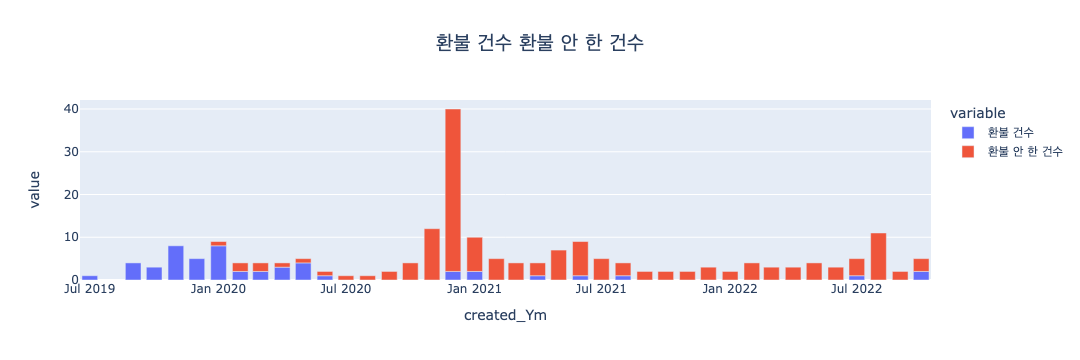

In [326]:
fig5 = px.bar(middle_Ym, x="created_Ym", y=["환불 건수", "환불 안 한 건수"], title="환불 건수 환불 안 한 건수")
fig5.update_layout(
    title={
        'font': {'family': "verdana", 'size': 20},
        'x': 0.5,
        'xanchor': 'center'
    }
)

In [327]:
df_non_refund_personal = df_non_refund[df_non_refund['target_customer']=='개인']
personal = df_non_refund_personal.groupby('created_Ym')['price'].sum().reset_index()

df_non_refund_small = df_non_refund[df_non_refund['target_customer']=='작은 사업체']
small = df_non_refund_small.groupby('created_Ym')['price'].sum().reset_index()

df_non_refund_middle = df_non_refund[df_non_refund['target_customer']=='중간 사업체']
middle = df_non_refund_middle.groupby('created_Ym')['price'].sum().reset_index()

df_non_refund_big = df_non_refund[df_non_refund['target_customer']=='큰 사업체']
big = df_non_refund_big.groupby('created_Ym')['price'].sum().reset_index()

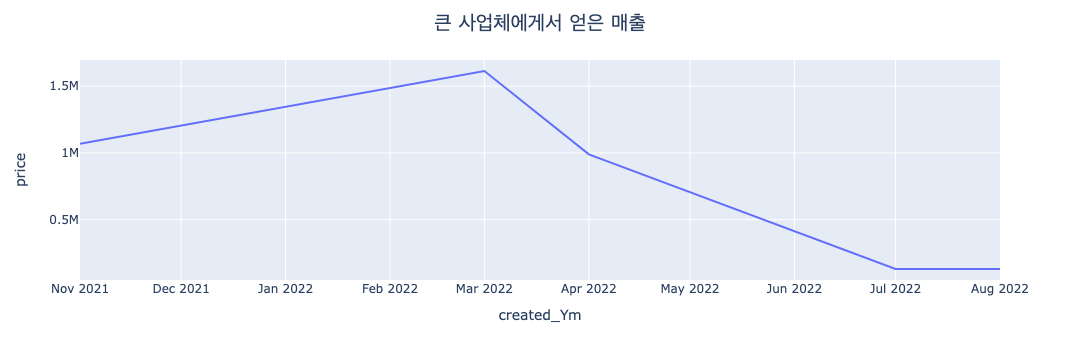

In [328]:
fig6 = px.line(personal, x='created_Ym', y='price')
fig6.update_layout(
    title={
        'text':'개인에게서 얻은 매출',
        'font': {'family': "verdana", 'size': 20},
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig7 = px.line(small, x='created_Ym', y='price')
fig7.update_layout(
    title={
        'text':'작은 사업체에게서 얻은 매출',
        'font': {'family': "verdana", 'size': 20},
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig8 = px.line(middle, x='created_Ym', y='price')
fig8.update_layout(
    title={
        'text':'중간 사업체에게서 얻은 매출',
        'font': {'family': "verdana", 'size': 20},
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig9 = px.line(big, x='created_Ym', y='price')
fig9.update_layout(
    title={
        'text':'큰 사업체에게서 얻은 매출',
        'font': {'family': "verdana", 'size': 20},
        'x': 0.5,
        'xanchor': 'center'
    }
)

In [329]:
# data = {
#     'iso_alpha': ['USA', 'BRA', 'ESP', 'GBR', 'FRA', 'DEU', 'KOR', 'AUS', 'JPN'],
#     'pop': [8600, 10600, 1700, 1660, 1650, 1900, 1750, 600, 1850],
#     'country': ['미국', '브라질', '스페인', '영국', '프랑스', '독일', '한국', '호주', '일본']
# }

# df = pd.DataFrame(data)

# fig5 = px.scatter_geo(df, locations="iso_alpha", 
#                      hover_name="country", size="pop",
#                      projection="natural earth",
#                      size_max = 40)

# fig5.update_layout(
#     title={
#         'text':'늘어난 크리에이터 규모',
#         'font': {'family': "verdana", 'size': 20},
#         'x': 0.5,
#         'xanchor': 'center'
#     }
# )

In [330]:
# Create the dash app
app = jupyter_dash.JupyterDash(__name__)

# Define the app layout
app.layout = html.Div(
    [
        html.H1("My Dashboard", style={"textAlign": "center"}),
        html.Div(
            [
                dcc.Graph(
                    id="graph1",
                    figure=fig1,
                    style={
                        "height": "25vh", 
                        "width": "23%", 
                        "float": "left",


       
                        'margin': '10px',
                        'display': 'inline-block',
                    
                    },
                ),
                dcc.Graph(
                    id="graph2",
                    figure=fig2,
                    style={
                        "height": "25vh", 
                        "width": "23%", 
                        "float": "left",
    
       
                
              
                        'margin': '10px',
                        'display': 'inline-block',
                    
                    },
                ),
                dcc.Graph(
                    id="graph3",
                    figure=fig3,
                    style={
                        "height": "25vh", 
                        "width": "23%", 
                        "float": "left",
  
          
                        'margin': '10px',
                        'display': 'inline-block',
                    
                    },
                ),
                dcc.Graph(
                    id="graph4",
                    figure=fig4,
                    style={
                        "height": "25vh", 
                        "width": "23%", 
                        "float": "left",
         
                
                        'margin': '10px',
                        'display': 'inline-block',
                    
                    },
                ),
            ],
            style={"width": "100%", "display": "flex", "flex-wrap": "wrap"},
            className='graph-container'
        ),
        html.Div([
                 dcc.Graph(
                    id="graph5",
                    figure=fig5,
                    style={
                        "height": "60vh", 
                        "width": "47.4%", 
                        "float": "left",
  
             
                        'margin': '10px',
                        'display': 'inline-block',
                    
                    },
                ),           
            
            html.Div([
                dcc.Dropdown(
                    id='dropdown_for_practice',
                    options=[
                        {'label': 'Personal', 'value': 'person'},
                        {'label': 'smallBiz', 'value': 'small'},
                        {'label': 'middleBiz', 'value': 'middle'},
                        {'label': 'bigBiz', 'value': 'big'}
                    ],
                    value='data4'
                ),
                dcc.Graph(id='graph_with_dropdown')
            ], 
                    style={
                    "height": "50vh", 
                    "width": "47.4%", 
                    "float": "left",
   
  
                    'margin': '10px',
                    'display': 'inline-block',
                    
                },
            
                className='six columns'),
        ],
         style={"width": "100%", "display": "flex", "flex-wrap": "wrap"},
        ),
    ],


    style={
        "width": "80%",
        "background-color": "#F8F8F8",
        "font-family": "verdana",
        "color": "#333",
        "padding": '20px',
       
    },
)

@app.callback(Output('graph_with_dropdown', 'figure'), [Input('dropdown_for_practice', 'value')])
def update_figure(selected_value):
    if selected_value == 'person':
        fig = fig6
        
    elif selected_value == 'small':
        fig = fig7
        
    elif selected_value == 'middle':
        fig = fig8
        
    else:
        fig = fig9
    return fig


if __name__ == "__main__":
    app.run_server(mode='jupyterlab', dev_tools_hot_reload=True)


Dash is running on http://127.0.0.1:8050/

